In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows',None)

# Reading files

In [2]:
churn = pd.read_csv('churn_data.csv')
cust = pd.read_csv('customer_data.csv')
inter = pd.read_csv('internet_data.csv')

In [3]:
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7042 entries, 0 to 7041
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7042 non-null   object 
 1   tenure            7042 non-null   int64  
 2   PhoneService      7042 non-null   object 
 3   Contract          7042 non-null   object 
 4   PaperlessBilling  7042 non-null   object 
 5   PaymentMethod     7042 non-null   object 
 6   MonthlyCharges    7042 non-null   float64
 7   TotalCharges      7042 non-null   object 
 8   Churn             7042 non-null   object 
dtypes: float64(1), int64(1), object(7)
memory usage: 495.3+ KB


In [4]:
cust.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7042 entries, 0 to 7041
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     7042 non-null   object
 1   gender         7042 non-null   object
 2   SeniorCitizen  7042 non-null   int64 
 3   Partner        7042 non-null   object
 4   Dependents     7042 non-null   object
dtypes: int64(1), object(4)
memory usage: 275.2+ KB


In [5]:
inter.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7042 entries, 0 to 7041
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   customerID        7042 non-null   object
 1   MultipleLines     7042 non-null   object
 2   InternetService   7042 non-null   object
 3   OnlineSecurity    7042 non-null   object
 4   OnlineBackup      7042 non-null   object
 5   DeviceProtection  7042 non-null   object
 6   TechSupport       7042 non-null   object
 7   StreamingTV       7042 non-null   object
 8   StreamingMovies   7042 non-null   object
dtypes: object(9)
memory usage: 495.3+ KB


# Merging DF's

In [6]:
df=cust.merge(inter,on='customerID').merge(churn,on='customerID')

In [7]:
df['TotalCharges']=df['TotalCharges'].replace(" ",np.nan)

In [8]:
#checking our dependent variable

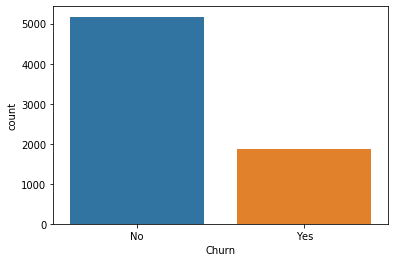

In [9]:
sns.countplot(data=df,x='Churn')

In [10]:
#converting object to numerical for total charges col

In [11]:
df['TotalCharges']=df['TotalCharges'].astype(float)

In [12]:
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
tenure               0
PhoneService         0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [13]:
# getting the median total churn to fillna
df = df.merge(df.groupby('Churn',as_index=False)['TotalCharges'].median().rename(columns={'TotalCharges':'Med_total_charges'}),on='Churn')
df['TotalCharges'] = np.where(df['TotalCharges'].isnull(),df['Med_total_charges'],df['TotalCharges'])

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7042 entries, 0 to 7041
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   customerID         7042 non-null   object 
 1   gender             7042 non-null   object 
 2   SeniorCitizen      7042 non-null   int64  
 3   Partner            7042 non-null   object 
 4   Dependents         7042 non-null   object 
 5   MultipleLines      7042 non-null   object 
 6   InternetService    7042 non-null   object 
 7   OnlineSecurity     7042 non-null   object 
 8   OnlineBackup       7042 non-null   object 
 9   DeviceProtection   7042 non-null   object 
 10  TechSupport        7042 non-null   object 
 11  StreamingTV        7042 non-null   object 
 12  StreamingMovies    7042 non-null   object 
 13  tenure             7042 non-null   int64  
 14  PhoneService       7042 non-null   object 
 15  Contract           7042 non-null   object 
 16  PaperlessBilling   7042 

In [15]:
#separating categorical from numerical values
categorical_var = df.select_dtypes(include='object')
numerical_var = df.select_dtypes(exclude='object')

In [16]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Med_total_charges
0,7590-VHVEG,Female,0,Yes,No,No phone service,DSL,No,Yes,No,No,No,No,1,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,1683.0
1,5575-GNVDE,Male,0,No,No,No,DSL,Yes,No,Yes,No,No,No,34,Yes,One year,No,Mailed check,56.95,1889.50,No,1683.0
2,7795-CFOCW,Male,0,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,45,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,1683.0
3,1452-KIOVK,Male,0,No,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,22,Yes,Month-to-month,Yes,Credit card (automatic),89.10,1949.40,No,1683.0
4,6713-OKOMC,Female,0,No,No,No phone service,DSL,Yes,No,No,No,No,No,10,No,Month-to-month,No,Mailed check,29.75,301.90,No,1683.0


# Categorical Variables countplots

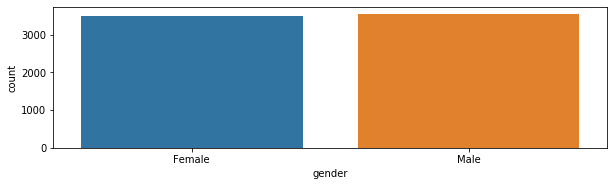

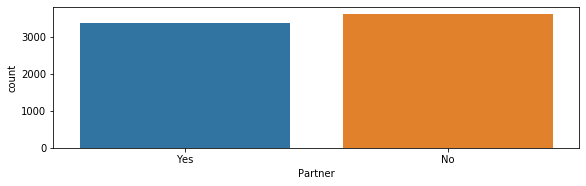

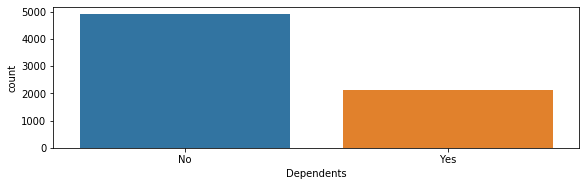

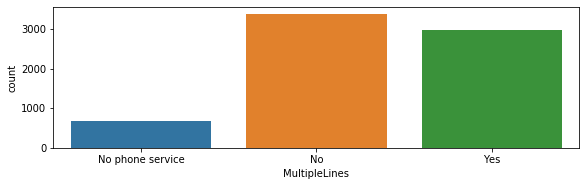

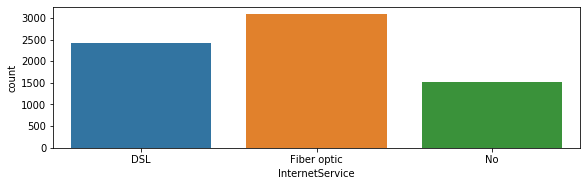

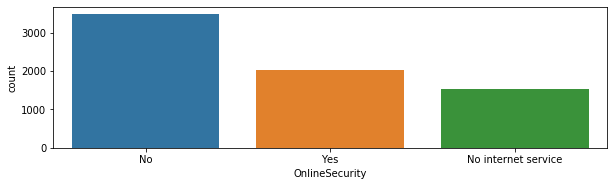

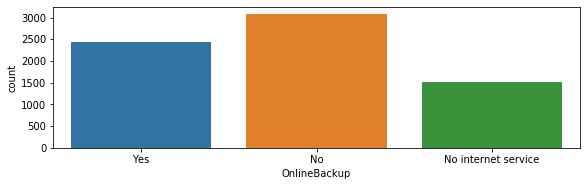

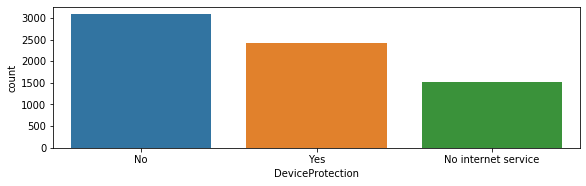

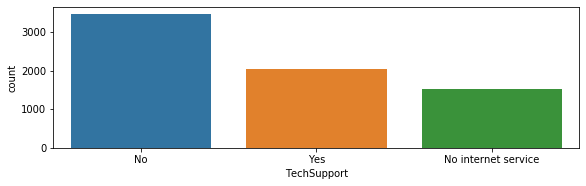

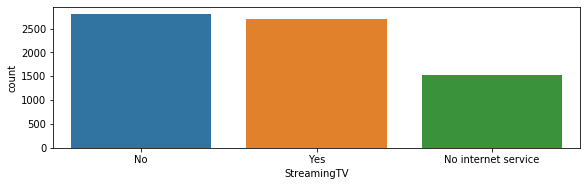

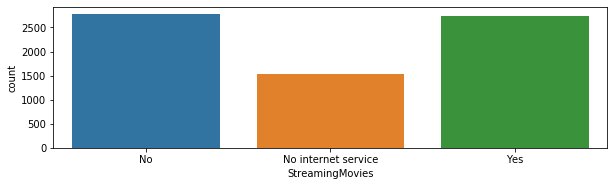

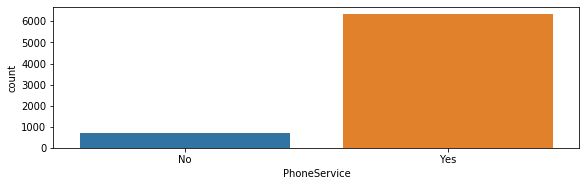

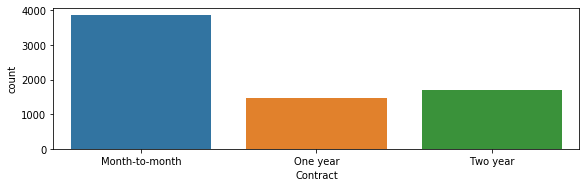

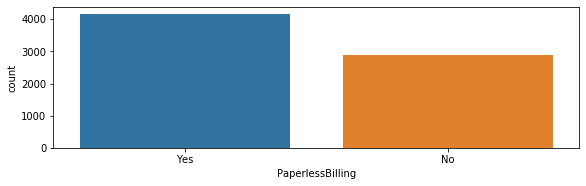

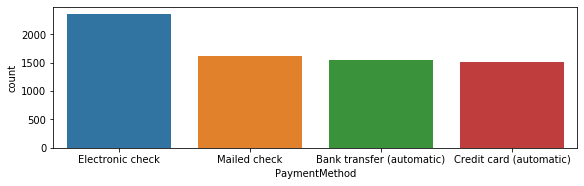

In [17]:
#graphs to get an idea of categorical variables count
for i,col in enumerate(categorical_var.drop(['customerID','Churn'],axis=1),1):
    plt.figure(figsize=(40,20))
    plt.subplot(8,5,i)
    sns.countplot(categorical_var[col])
    plt.tight_layout()
   

# Numerical var analysis

In [18]:
numerical_var.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Med_total_charges
0,0,1,29.85,29.85,1683.0
1,0,34,56.95,1889.50,1683.0
2,0,45,42.30,1840.75,1683.0
3,0,22,89.10,1949.40,1683.0
4,0,10,29.75,301.90,1683.0


In [19]:
numerical_var.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Med_total_charges
count,7042.000000,7042.000000,7042.000000,7042.000000,7042.000000
mean,0.162170,32.366373,64.755886,2281.715024,1423.046571
std,0.368633,24.557955,30.088238,2264.632528,432.506838
min,0.000000,0.000000,18.250000,18.800000,703.550000
25%,0.000000,9.000000,35.500000,402.087500,703.550000
50%,0.000000,29.000000,70.350000,1400.425000,1683.000000
75%,0.000000,55.000000,89.850000,3783.600000,1683.000000
max,1.000000,72.000000,118.750000,8684.800000,1683.000000


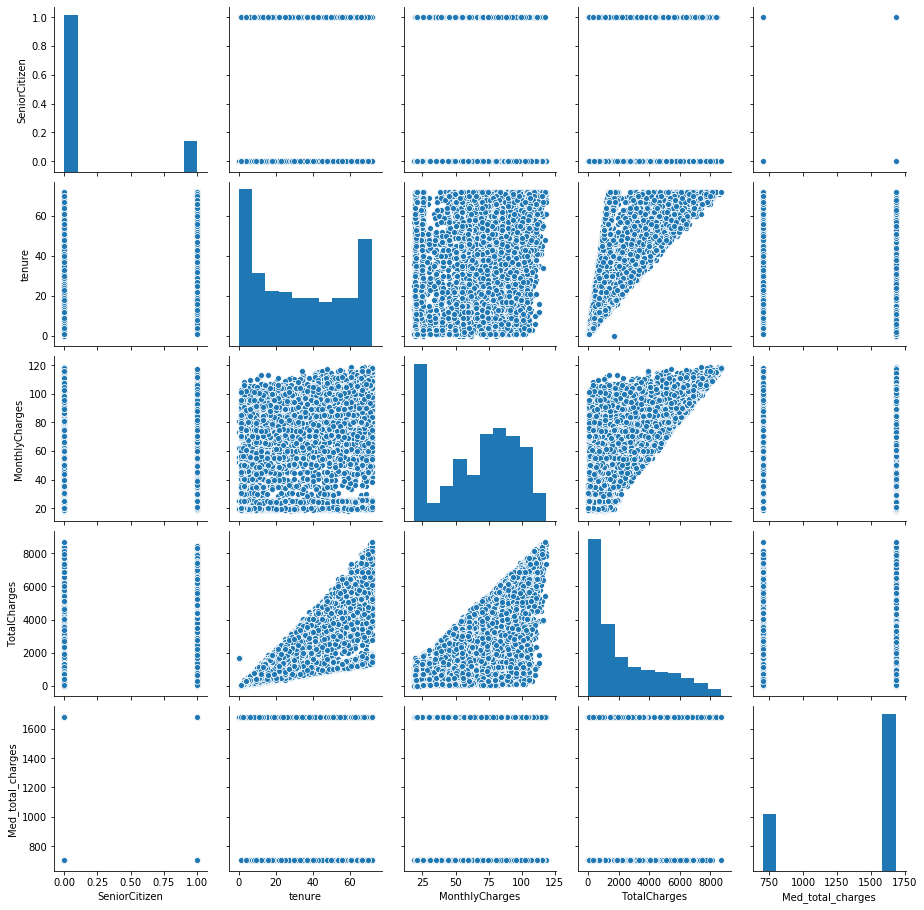

In [20]:
sns.pairplot(numerical_var)   

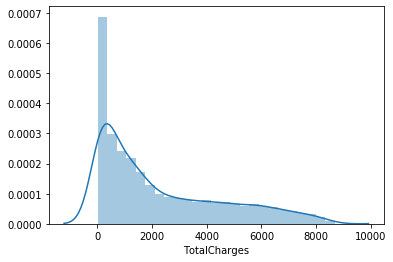

In [21]:
sns.distplot(numerical_var['TotalCharges'])

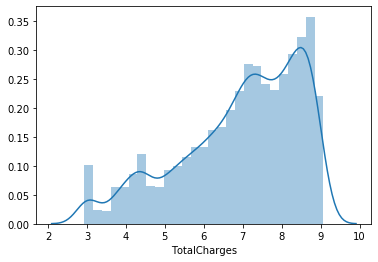

In [22]:
sns.distplot(np.log(numerical_var['TotalCharges']))

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7042 entries, 0 to 7041
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   customerID         7042 non-null   object 
 1   gender             7042 non-null   object 
 2   SeniorCitizen      7042 non-null   int64  
 3   Partner            7042 non-null   object 
 4   Dependents         7042 non-null   object 
 5   MultipleLines      7042 non-null   object 
 6   InternetService    7042 non-null   object 
 7   OnlineSecurity     7042 non-null   object 
 8   OnlineBackup       7042 non-null   object 
 9   DeviceProtection   7042 non-null   object 
 10  TechSupport        7042 non-null   object 
 11  StreamingTV        7042 non-null   object 
 12  StreamingMovies    7042 non-null   object 
 13  tenure             7042 non-null   int64  
 14  PhoneService       7042 non-null   object 
 15  Contract           7042 non-null   object 
 16  PaperlessBilling   7042 

In [24]:
df.head(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Med_total_charges
0,7590-VHVEG,Female,0,Yes,No,No phone service,DSL,No,Yes,No,No,No,No,1,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,1683.0
1,5575-GNVDE,Male,0,No,No,No,DSL,Yes,No,Yes,No,No,No,34,Yes,One year,No,Mailed check,56.95,1889.50,No,1683.0
2,7795-CFOCW,Male,0,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,45,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,1683.0
3,1452-KIOVK,Male,0,No,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,22,Yes,Month-to-month,Yes,Credit card (automatic),89.10,1949.40,No,1683.0
4,6713-OKOMC,Female,0,No,No,No phone service,DSL,Yes,No,No,No,No,No,10,No,Month-to-month,No,Mailed check,29.75,301.90,No,1683.0
5,6388-TABGU,Male,0,No,Yes,No,DSL,Yes,Yes,No,No,No,No,62,Yes,One year,No,Bank transfer (automatic),56.15,3487.95,No,1683.0
6,9763-GRSKD,Male,0,Yes,Yes,No,DSL,Yes,No,No,No,No,No,13,Yes,Month-to-month,Yes,Mailed check,49.95,587.45,No,1683.0
7,7469-LKBCI,Male,0,No,No,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,16,Yes,Two year,No,Credit card (automatic),18.95,326.80,No,1683.0
8,8091-TTVAX,Male,0,Yes,No,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,58,Yes,One year,No,Credit card (automatic),100.35,5681.10,No,1683.0
9,5129-JLPIS,Male,0,No,No,No,Fiber optic,Yes,No,Yes,Yes,Yes,Yes,25,Yes,Month-to-month,Yes,Electronic check,105.50,2686.05,No,1683.0


# Data Preprocessing

In [25]:
def covert_1_0(col):
    if col == 'Yes':
        return 1
    else:
        return 0 

In [26]:
for col in df[['Partner','Dependents','PaperlessBilling','Churn','PhoneService']]:
    df[col] = df[col].apply(covert_1_0)
    

In [27]:
df.head(20)

,customerID,gender,SeniorCitizen,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Med_total_charges
0,7590-VHVEG,Female,0,1,0,No phone service,DSL,No,Yes,No,No,No,No,1,0,Month-to-month,1,Electronic check,29.85,29.85,0,1683.0
1,5575-GNVDE,Male,0,0,0,No,DSL,Yes,No,Yes,No,No,No,34,1,One year,0,Mailed check,56.95,1889.50,0,1683.0
2,7795-CFOCW,Male,0,0,0,No phone service,DSL,Yes,No,Yes,Yes,No,No,45,0,One year,0,Bank transfer (automatic),42.30,1840.75,0,1683.0
3,1452-KIOVK,Male,0,0,1,Yes,Fiber optic,No,Yes,No,No,Yes,No,22,1,Month-to-month,1,Credit card (automatic),89.10,1949.40,0,1683.0
4,6713-OKOMC,Female,0,0,0,No phone service,DSL,Yes,No,No,No,No,No,10,0,Month-to-month,0,Mailed check,29.75,301.90,0,1683.0
5,6388-TABGU,Male,0,0,1,No,DSL,Yes,Yes,No,No,No,No,62,1,One year,0,Bank transfer (automatic),56.15,3487.95,0,1683.0
6,9763-GRSKD,Male,0,1,1,No,DSL,Yes,No,No,No,No,No,13,1,Month-to-month,1,Mailed check,49.95,587.45,0,1683.0
7,7469-LKBCI,Male,0,0,0,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,16,1,Two year,0,Credit card (automatic),18.95,326.80,0,1683.0
8,8091-TTVAX,Male,0,1,0,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,58,1,One year,0,Credit card (automatic),100.35,5681.10,0,1683.0
9,5129-JLPIS,Male,0,0,0,No,Fiber optic,Yes,No,Yes,Yes,Yes,Yes,25,1,Month-to-month,1,Electronic check,105.50,2686.05,0,1683.0


In [28]:
df['gender'] = df['gender'].apply(lambda x: 1 if x =='Female' else 0)

In [29]:
df.head(15)

,customerID,gender,SeniorCitizen,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Med_total_charges
0,7590-VHVEG,1,0,1,0,No phone service,DSL,No,Yes,No,No,No,No,1,0,Month-to-month,1,Electronic check,29.85,29.85,0,1683.0
1,5575-GNVDE,0,0,0,0,No,DSL,Yes,No,Yes,No,No,No,34,1,One year,0,Mailed check,56.95,1889.50,0,1683.0
2,7795-CFOCW,0,0,0,0,No phone service,DSL,Yes,No,Yes,Yes,No,No,45,0,One year,0,Bank transfer (automatic),42.30,1840.75,0,1683.0
3,1452-KIOVK,0,0,0,1,Yes,Fiber optic,No,Yes,No,No,Yes,No,22,1,Month-to-month,1,Credit card (automatic),89.10,1949.40,0,1683.0
4,6713-OKOMC,1,0,0,0,No phone service,DSL,Yes,No,No,No,No,No,10,0,Month-to-month,0,Mailed check,29.75,301.90,0,1683.0
5,6388-TABGU,0,0,0,1,No,DSL,Yes,Yes,No,No,No,No,62,1,One year,0,Bank transfer (automatic),56.15,3487.95,0,1683.0
6,9763-GRSKD,0,0,1,1,No,DSL,Yes,No,No,No,No,No,13,1,Month-to-month,1,Mailed check,49.95,587.45,0,1683.0
7,7469-LKBCI,0,0,0,0,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,16,1,Two year,0,Credit card (automatic),18.95,326.80,0,1683.0
8,8091-TTVAX,0,0,1,0,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,58,1,One year,0,Credit card (automatic),100.35,5681.10,0,1683.0
9,5129-JLPIS,0,0,0,0,No,Fiber optic,Yes,No,Yes,Yes,Yes,Yes,25,1,Month-to-month,1,Electronic check,105.50,2686.05,0,1683.0


In [30]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'tenure', 'PhoneService', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'Med_total_charges'],
      dtype='object')

In [31]:
data_dum = pd.get_dummies(df[['MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies','Contract','PaymentMethod']],drop_first=True)

In [32]:
df_to_model =pd.concat([df,data_dum],axis=1).drop(['MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies','Contract','PaymentMethod','customerID'],axis=1)

# Modeling

In [33]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm

In [34]:
scaler = StandardScaler()

In [35]:
df_to_model[['tenure','MonthlyCharges','TotalCharges']] = scaler.fit_transform(df_to_model[['tenure','MonthlyCharges','TotalCharges']])

In [36]:
df_to_model.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,Med_total_charges,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,0,1,0,-1.277330,0,1,-1.160200,-0.994433,0,1683.0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0.066526,1,0,-0.259452,-0.173204,0,1683.0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1
2,0,0,0,0,0.514478,0,0,-0.746387,-0.194732,0,1683.0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0
3,0,0,0,1,-0.422149,1,1,0.809148,-0.146752,0,1683.0,0,1,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0
4,1,0,0,0,-0.910823,0,0,-1.163524,-0.874294,0,1683.0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [37]:
X = df_to_model.drop(['Churn','Med_total_charges'],axis=1)
y = df_to_model['Churn']

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [39]:
lr = LogisticRegression()

In [40]:
lr.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [41]:
pred = lr.predict(X_test)

In [42]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.86      0.92      0.89      1561
           1       0.71      0.58      0.64       552

    accuracy                           0.83      2113
   macro avg       0.78      0.75      0.76      2113
weighted avg       0.82      0.83      0.82      2113



In [43]:
confusion_matrix(y_test,pred)

array([[1430,  131],
       [ 233,  319]])